In [129]:
# Vẫn chưa tìm được cách chạy được thuật toán NeuralNetwork

In [130]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([1000000.0,9000.3])
        self.bias = 30000.1
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (100000 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 14444
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):

            data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[data_index]
            target = targets[data_index]

            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)
            if current_iteration % 1000 == 0:
                cumulative_error = 0

                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error = cumulative_error + error + targets[data_index]
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

[2363945935223.0, 2363950466223.0, 2363945866223.0, 2363945942123.0, 2363955756223.0]


Text(0, 0.5, 'Sai số dự kiến')

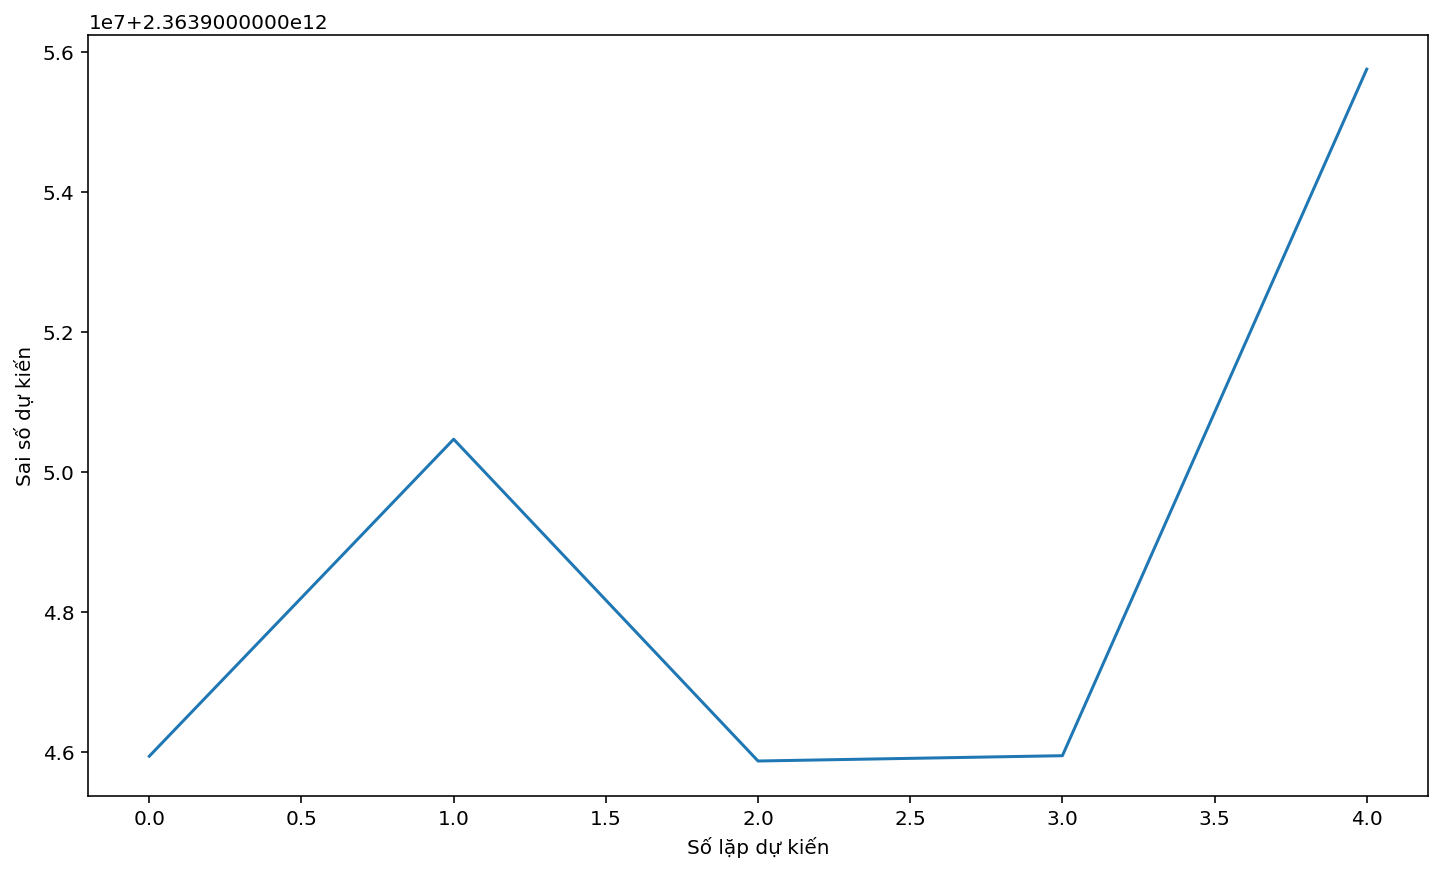

In [131]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import numpy as np

DATA = []
if os.path.exists('data_reformat.csv'):
    DATA = pd.read_csv('data_reformat.csv')
else:
    DATA = reformat('data_reformat.csv')
price_from = DATA['price_from'].tolist()
district = DATA['district'].tolist()
districtList = sorted(DATA['district'].drop_duplicates().tolist())
price_from_mean = []
price_to_mean = []
input_vectors = []
rate = DATA['rate'].tolist()
for distr in districtList:
    price_to_mean.append(DATA[DATA['district']==distr]['price_to'].mean())
    price_from_mean.append(DATA[DATA['district']==distr]['price_from'].mean())
for i in range(0,len(price_from_mean)):
    input_vectors.append([round(price_from_mean[i]),round(price_to_mean[i])])

targets = np.array([50000,80000,90000,22000,11000,45000,200000,10000,760000,54000,1240000,3000,30000,430000,0,8900,6700,3300,0,9000,0,9000,0])

learning_rate = 1.1
neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 5000)
print(training_error)
plt.plot(training_error)
plt.xlabel("Số lặp dự kiến")
plt.ylabel("Sai số dự kiến")